In [16]:
import numpy as np
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [17]:
boston = np.loadtxt("0000000000002417_training_boston_x_y_train.csv", delimiter=",", skiprows=1)
X = boston[:, :-1]
y = boston[:, -1]

sq = X ** 2
X = np.append(X, sq, axis=1)

interaction_terms = []
for i, j in itertools.combinations(range(X.shape[1] // 2), 2):
    interaction = (X[:, i] * X[:, j]).reshape(-1, 1)
    interaction_terms.append(interaction)

interaction_terms = np.hstack(interaction_terms)
X = np.append(X, interaction_terms, axis=1)

In [18]:
scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
def step(x, y, m, c, learning_rate):
    m_grad = np.zeros(len(m))  # Initialize slope gradients for all features
    c_grad = 0                 # Initialize intercept gradient

    for i in range(len(x)):
        y_pred_i = np.dot(x[i], m) + c       # Prediction for x[i]
        error = y[i] - y_pred_i              # Error for that prediction

        # Accumulate gradients
        m_grad += (-2 / len(x)) * error * x[i]  # Vector update for slopes
        c_grad += (-2 / len(x)) * error         # Scalar update for intercept

    # Update parameters
    m = m - learning_rate * m_grad
    c = c - learning_rate * c_grad

    return m, c


# --- Batch Gradient Descent Runner ---
def gradient_descent(x, y, learning_rate, iterations):
    m = np.zeros(x.shape[1])  # Initialize weights (one per feature)
    c = 0                     # Initialize bias

    for i in range(iterations):
        m, c = step(x, y, m, c, learning_rate)
        print(f"Iteration {i+1}, Cost: {cost(x, y, m, c)}")  # Track loss

    return m, c


# --- Mean Squared Error (Cost Function) ---
def cost(x, y, m, c):
    return np.mean((y - (np.dot(x, m) + c)) ** 2)


# --- Prediction Function ---
def predict(x, m, c):
    return np.dot(x, m) + c


# --- R² Score (Performance Metric) ---
def score(y_truth, y_pred):
    u = ((y_truth - y_pred) ** 2).sum()  # Residual sum of squares
    v = ((y_truth - y_truth.mean()) ** 2).sum()  # Total sum of squares
    return 1 - u / v  # R² = 1 - (residual / total)


In [21]:
m, c = gradient_descent(X_train, y_train, learning_rate=0.01, iterations=10000)
score_train = score(y_train, predict(X_train, m, c))
score_test = score(y_test, predict(X_test, m, c))
print(f"Training R² Score: {score_train}")
print(f"Testing R² Score: {score_test}")

Iteration 1, Cost: 554.3961344057637
Iteration 2, Cost: 520.23108051584
Iteration 3, Cost: 491.8154874277275
Iteration 4, Cost: 466.96629811853825
Iteration 5, Cost: 444.6259921933577
Iteration 6, Cost: 424.2054580751477
Iteration 7, Cost: 405.33598714624634
Iteration 8, Cost: 387.76577117306465
Iteration 9, Cost: 371.31172686002134
Iteration 10, Cost: 355.83462007329604
Iteration 11, Cost: 341.2250134096913
Iteration 12, Cost: 327.3947149579872
Iteration 13, Cost: 314.27124731800836
Iteration 14, Cost: 301.79408655869975
Iteration 15, Cost: 289.9119984642458
Iteration 16, Cost: 278.5810895663541
Iteration 17, Cost: 267.7633444241658
Iteration 18, Cost: 257.4255061669616
Iteration 19, Cost: 247.5382068834502
Iteration 20, Cost: 238.07528434963749
Iteration 21, Cost: 229.01324037853578
Iteration 22, Cost: 220.33080836145146
Iteration 23, Cost: 212.0086059124744
Iteration 24, Cost: 204.02885438653323
Iteration 25, Cost: 196.37515127685376
Iteration 26, Cost: 189.03228463277725
Iteration 

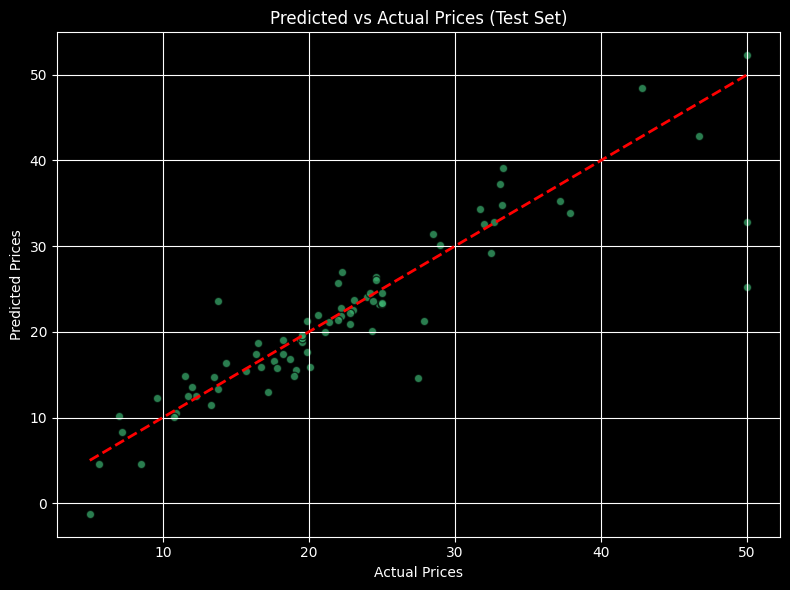

In [22]:
# Make predictions on the test set
y_pred_test = predict(X_test, m, c)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='mediumseagreen', alpha=0.7, edgecolors='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
X = np.loadtxt("0000000000002417_test_boston_x_test.csv", delimiter=",")

sq = X ** 2
X = np.append(X, sq, axis=1)

interaction_terms = []
for i, j in itertools.combinations(range(X.shape[1] // 2), 2):
    interaction = (X[:, i] * X[:, j]).reshape(-1, 1)
    interaction_terms.append(interaction)

interaction_terms = np.hstack(interaction_terms)
X = np.append(X, interaction_terms, axis=1)
X.shape

(127, 104)

In [24]:
X_scaled = scale.transform(X)

predictions = predict(X_scaled, m, c)

np.savetxt("predictions.csv", predictions, delimiter=",", comments='', fmt='%.5f')